# TensorFlow 2 and Keras API

## Deep Learning Frameworks

![alt text](https://cdn-gcp.marutitech.com/wp-media/2018/03/8f25ea16-top-8-deep-learning-frameworks.png "deep learning frameworks"
        )


### Tensorflow: 
Tensorflow is a popular open-source library, released in 2015 by Google Brain for machine learning and deep learning models. TensorFlow supports languages such as Python, C++, and R to create deep learning models along with wrapper libraries. 



### Keras: 
Keras is a **high-level** library that is built on top of TensorFlow, which from Tensorflow 2.0 became integrated into the library (you only need to install Tensorflow 2). The key idea behind the development of Keras is to facilitate experimentations by fast prototyping.  A good rule of thumb is to use Keras unless you are building a very special neural network or you want the control and ability to watch how your network changes over time.

![alt text](https://jamesmccaffrey.files.wordpress.com/2019/08/neural_library_comparison.jpg "keras"
        )


It used to support other backends like Theano/CNTK (microsoft congnitive toolkit), but not anymore. 

Let's compare the complexities: 


### Scikit-learn : 
Same inferface for all the supervised models. But with the intereface you require no information of the internal model. 
```
model = MLP()
model.fit(X,Y)
model.predict(X)
```

### Keras: 
A bit more details, but still you can build a network with little knowledge of the internals. 
```
model = Sequential()
model.add(Dense(units=M, input_dim=D))
model.add(Activation('relu')
model.add(Dense(units=k))
model.add(Activation('softmax')
model.compile(loss='categorical_crossentropy')
model.fit(X,Y)
model.predict(X) 

```

### How Does TensorFlow Work? 

TensorFlow performs computations with **computation graphs**. **Nodes** represent the **operations**, **Edges** mainly carry data structures (tensors), where an output of one operation (from one node) becomes the input for another operation. You can represent complex operations in terms of a graph: 

Consider this function: $g=(x+y)*z$, with $x=1,y=3,z=−3$. The computational graph of the function is shown below, it becomes useful during optimization. In our case, we would like to minimize $g$ as our cost function. Through left to right pass, you can compute $g$ and with the right to left pass, you can compute the gradients using the chain rules. 

![alt text](https://www.tutorialspoint.com/python_deep_learning/images/forward_pass_equation.jpg "keras"
        )


![alt text](https://www.tutorialspoint.com/python_deep_learning/images/backward_pass.jpg "keras"
        )


## TensorFlow Toolkit Hierarchy
At the highest level, you have **Keras** and the **estimators**(TensorFlow Estimator is a high-level TensorFlow API that greatly simplifies machine learning programming), which are built on top of reusable libraries for model building (you can swap different layers). Low-level API allows you to further change the details of the model. The code itself can run on multiple platforms. 

![alt text](https://developers.google.com/machine-learning/crash-course/images/TFHierarchyNew.svg "keras"
        )


Let's take a look at the architecture...

![alt text](https://1.bp.blogspot.com/-4C_bx62kOI4/XfE3XQT422I/AAAAAAAABmY/AbMfOO8yzjctmg30IcgOBaU5UmcZNpAtwCLcBGAsYHQ/s1600/model.png "keras"
        )

### Tensor: 
The core component is a **Tensor**, a **vector** or **matrix** of n-dimensions that represents all data types.
![alt text](https://www.kdnuggets.com/wp-content/uploads/scalar-vector-matrix-tensor.jpg "keras" )


In TensorFlow, tensors are defined by a **unit of dimensionality** called as a **rank**. 
A single number is what constitutes a scalar (0-rank (0D) tensor). A vector is a single dimension (1D, rank 1) tensor and a matrix is arranged as a grid of numbers and is technically a 2 dimension (2D) tensor. While, technically, all of the mentioned data types are tensors, informally when we speak of tensors we are generally speaking of the generalization of the concept of a matrix to 3 or more dimensions. 

- **Shape:** The length (number of elements) of each of the axes of a tensor.
- **Rank:** Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
- **Axis or Dimension:** A particular dimension of a tensor.
- **Size:** The total number of items in the tensor, the product of the element of the shape vector.

![alt text](https://www.tensorflow.org/guide/images/tensor/shape.png "keras" )
![alt text](https://www.tensorflow.org/guide/images/tensor/4-axis_block.png "keras" )

Tensors are (kind of) like np.arrays. There are two kinds of important tensors: **tf.constant** and **tf.Variable**. 

As obvious by the name, Constants are used as **constants**. They create a node that takes a value that cannot change. You can only initialize them by a value and not an operation. 

In [2]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.4.1'

In [4]:
a = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
a

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])>

In [3]:
zeros = tf.zeros( shape=(3,4), dtype = tf.float64)
zeros

<tf.Tensor: shape=(3, 4), dtype=float64, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])>

In [5]:
ones = tf.ones( shape= [3,4], dtype = tf.int32)
tensor_as_float = tf.cast(ones,tf.float64)
tensor_as_float

<tf.Tensor: shape=(3, 4), dtype=float64, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])>

In [6]:
random = tf.random.uniform( shape= [3,4])
random

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.32669318, 0.45544958, 0.3584429 , 0.07073712],
       [0.6238569 , 0.08552432, 0.25466347, 0.03679383],
       [0.29987407, 0.6054789 , 0.9344928 , 0.00379372]], dtype=float32)>

 **shapes:**
It is important to keep track of the meaning of each axis. Often axes are ordered from global to local: The batch axis - spatial dimensions (height,width,time) - features (embeddings). This way feature vectors are contiguous regions of memory. 
![alt text](https://www.tensorflow.org/guide/images/tensor/shape2.png "keras" )

In [9]:
print("Type of every element:", a.dtype)
print("Number of axes:", a.ndim)
print("Shape of tensor (batch,time,features)>:", a.shape)
print("Elements along axis 0 of tensor:", a.shape[0])
print("Elements along the last axis of tensor:", a.shape[-1])
print("Total number of elements (3*2*5): ", tf.size(a).numpy())

Type of every element: <dtype: 'int32'>
Number of axes: 3
Shape of tensor (batch,time,features)>: (3, 2, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*5):  30


In [13]:
tf.size(a).numpy()

30

**Indexing:** Very similar to NumPy. 

For single-axis: 
- starts at 0
- negative indices count backward from the end
- colons for slices 

In [7]:
print("Second row, Second column, Second third axis", a[1, 1,1].numpy())
print("unitll the third row, Second column, Second third axis", a[:2, 1,1].numpy())

Second row, Second column, Second third axis 16
unitll the third row, Second column, Second third axis [ 6 16]


**Manipulating Shapes:** very important. You often find yourself changing the shape of tensor to input different layers. 


In [14]:
reshaped = tf.reshape(a, [3, 10]) 
print("Reshaped from {} to {}".format(a.shape, reshaped.shape))
print("Flatten tensor: ", tf.reshape(a, [-1]))# `-1` passed in the `shape` argument says "Whatever fits".
print("transposed from {} to {}:".format(a.shape ,tf.transpose(a,(1,0,2)).shape))

Reshaped from (3, 2, 5) to (3, 10)
Flatten tensor:  tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)
transposed from (3, 2, 5) to (2, 3, 5):


In [15]:
print(reshaped)

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix. You can always reshape a tensor to a new tensor with the same total number of elements, but you should respect the order of the axes.
Swapping axes in `tf.reshape` does not work; you need `tf.transpose` for that. If the new shape is `None` then you have done something wrong. 
![alt text](https://www.tensorflow.org/guide/images/tensor/reshape-before.png "keras" )
![alt text](https://www.tensorflow.org/guide/images/tensor/reshape-good1.png "keras" )
![alt text](https://www.tensorflow.org/guide/images/tensor/reshape-good2.png "keras" )
These do not make sense: 
![alt text](https://www.tensorflow.org/guide/images/tensor/reshape-bad.png "keras" )
![alt text](https://www.tensorflow.org/guide/images/tensor/reshape-bad4.png "keras" )
![alt text](https://www.tensorflow.org/guide/images/tensor/reshape-bad2.png "keras" )

**Variable** are stateful nodes, meaning that they can retain their value over multiple executions of a graph. On the contrary to constant tensors, their value is changed during training and these are what make up the parameters of the mode. 

In [18]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)
my_variable

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [16]:

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

Most tensor operations from the constant section also work on variables, although variables **cannot** be reshaped. However, values can be assigned to them using `assign`, which often uses the existing memory of the tensor to assign a new value and does not make a copy. The type and the shape of the assigned tensor should match the previous one. 



In [19]:
# This creates a new tensor; it does not reshape the variable.
print("Copying and reshaping: ", tf.reshape(my_variable, ([1,4])))
#print("New value:",my_variable.assign([1, 2]) )
#print("New value:",my_variable.assign([[1, 2],[1, 2]]) )
print("New value:",my_variable.assign([[1.0, 2.0],[1.0, 2.0]]) )

Copying and reshaping:  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)
New value: <tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [1., 2.]], dtype=float32)>


Some functions: 

In [20]:
concat = tf.concat( values=[my_tensor,my_variable],axis=1)#axis=1, by rows
concat

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 1., 2.],
       [3., 4., 1., 2.]], dtype=float32)>

In [21]:
my_tensor + my_variable #you have operation overload for common operator

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 4.],
       [4., 6.]], dtype=float32)>

In [22]:
tf.matmul(my_tensor,my_variable) #also functions like matrix multiplications, for rest look at the doc

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 3.,  6.],
       [ 7., 14.]], dtype=float32)>

In [23]:
tf.multiply(my_tensor,my_variable)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 4.],
       [3., 8.]], dtype=float32)>

**Glimpse of tf.function:**
this will take a Python function and return a TensorFlow graph. The advantage of this is that graphs can apply optimizations and exploit parallelism in the Python function (func).


In [24]:
def linear(m,x,b):
    return m*x+b

m = tf.constant([2,3])
x = tf.constant([10,20])
b=2

linear(m,x,b)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([22, 62])>

So far we looked at how underlying functions of TensorFlow are like NumPy arrays. But what sets them apart from NumPy objects is automatic differentiation. 
To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.

**Gradient tapes:**  
`tf.Variables` in TensorFlow "record" relevant operations executed onto a "tape"(`tf.GradientTape`). TensorFlow then uses that tape to compute the gradients with reverse-mode differentiation.

In [26]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = tf.matmul(x,w) + b
    loss = tf.reduce_mean(y**2)

In [27]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b]) #GradientTape.gradient(target, sources)
print(w.shape)
print(dl_dw.shape)
w

(3, 2)
(3, 2)


<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.24059273,  0.52459306],
       [ 0.0861493 , -0.06391019],
       [-1.1209941 , -1.4734967 ]], dtype=float32)>

In [29]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-2.950091 , -4.0237174], dtype=float32)>

Any deep learning model is an accumulation of many variables. In most cases, you will want to calculate gradients with respect to a model's trainable variables. All trainable variables of a `tf.Module` are aggregated  in the Module.trainable_variables property, you can calculate these gradients in a few lines of code:

In [19]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
    y = layer(x)
    loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)
for var, g in zip(layer.trainable_variables, grad):
    print(f'{var.name}, shape: {g.shape}')

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


# Models With Keras API

In general, the objective of using a deep learning library is to define a model that can be saved and restored: 
A model is, abstractly:

- A function that computes something on tensors (a forward pass)
- Some variables that can be updated in response to training


**tf.Module:** is the container that holds your model, with all the variables and layers. Each model is created from **layers**. Layers are functions with a known mathematical structure that can be reused and have trainable variables. In Keras the layers that are most commonly used are pre-build and you can use them out of the box. 

Keras offers some model building APIs: 
- **Sequential API:**  The Sequential API is the best for a simple model with a single input, output, and layer branch. 
-  **Functional API:** In addition to Sequential functionalities it also allows multiple inputs, multiple outputs, branching, and layer sharing. This allows for more customization and flexibility. (what you will use the most)
- **Model Subclassing:** Suitable for advanced level developers who need full control over their model, layer, and training process. You can add your own subclasses. 

![alt text](https://miro.medium.com/max/1400/1*WzwKtnA0LEhiCGdWTTpLaA.png "keras" )


## Deep Learning Model Life-Cycle

The six steps in the life-cycle are as follows:

1. **Define the model:** we use the APIs discussed above 
2. **Compile the model:** you choose the loss function, like mean squared error or cross-entropy, and an algorithm to perform the optimization procedure typically stochastic gradient descent, or a modern variation, such as Adam.
3. **Fit the model:**select the training configuration, number of epochs, and the batch size, then apply the chosen optimization algorithm to minimize the chosen loss function and updates the model using the backpropagation. 
4. **Evaluate the model:** evaluate the model on a held-out set to see the performance.
5. **Make predictions:** basically put the model to use in your application.
6. **Saving and Loading a Model:** for future use. 

### Sequential API 

It is referred to as “sequential” because it involves defining a Sequential class and adding layers to the model one by one in a linear manner, from input to output.
To look at how the Sequential API works we look at the example of predicting if a patients breast tissue is malignant or benign. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [30]:
from sklearn.datasets import load_breast_cancer
# load the data
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [31]:
# Bunch object
# like a dictionary 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [32]:
#data is the data iself and the target is what we want to predict 
data.data.shape #(569(samples),30(features))

(569, 30)

In [33]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [35]:
data.target.shape

(569,)

In [36]:
from sklearn.model_selection import train_test_split # to split the train and test set 
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape # we keep the shapes to define our model parameters afterwards. 

## Define the model:

In [37]:
# Build the model
model = tf.keras.models.Sequential(name="my_sequential") # useful for TensorBoard graphs 
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(D,)))# linear transformation 
model.add(tf.keras.layers.Dense(8, activation='relu'))# units=#outpus, activation=the activation function, use_bias=IF false no bais,
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))# we want to predict between 0 and 1 

In [38]:
model.layers# you can acess the layers with .layers attribute 

A Sequential model behaves very much like a list of layers.

In [39]:
print(len(model.layers)) # 3
model.pop()
print(len(model.layers))  # 2
model.layers

3
2


In [40]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.layers

In [41]:
model.weights[1]#to the parameteres (The weights of the first layer)

<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [42]:
model.summary() #shows the content of the model 

Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


## Compile the model: 

Keras API offers many built-in losses, metrics, or optimizers:

Optimizers:

- SGD (with or without momentum
- RMSprop
- Adam
...

Losses:

- MeanSquaredError
- KLDivergence
- CosineSimilarity
...

Metrics:
- AUC
- Precision
- Recall
...


In [43]:
model.compile(optimizer='adam',# optimizing algorithm
              loss='binary_crossentropy', # loss functions 
              metrics=['accuracy'])# metric we want to monitor, should be a list -- your model can have any number of metrics.

## Fit the model:

In [44]:
# Train the model
#we set a dev set from the train set 
r = model.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=50)# returns an object with information about training

Epoch 1/50
5/5 [==============================] - 1s 80ms/step - loss: 15.6104 - accuracy: 0.6504 - val_loss: 12.3895 - val_accuracy: 0.6753
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 13.6579 - accuracy: 0.6546 - val_loss: 10.4257 - val_accuracy: 0.6753
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 11.9285 - accuracy: 0.6242 - val_loss: 8.5375 - val_accuracy: 0.6753
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 9.7159 - accuracy: 0.6253 - val_loss: 6.7313 - val_accuracy: 0.6753
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 7.3987 - accuracy: 0.6365 - val_loss: 4.9775 - val_accuracy: 0.6753
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 5.6262 - accuracy: 0.6172 - val_loss: 3.3362 - val_accuracy: 0.6753
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 3.9181 - accuracy: 0.6259 - val_loss: 1.7878 - val_accuracy: 0.6753
Epoch 8/50
5/5 [======

## Evaluate the model: 

In [45]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 819us/step - loss: 0.3336 - accuracy: 0.8819
Train score: [0.33355000615119934, 0.8818897604942322]
6/6 [==============================] - 0s 998us/step - loss: 0.3098 - accuracy: 0.8989
Test score: [0.3098447024822235, 0.8989361524581909]


In [46]:
type(r.history) # holds a record of the loss values and metric values during training

dict

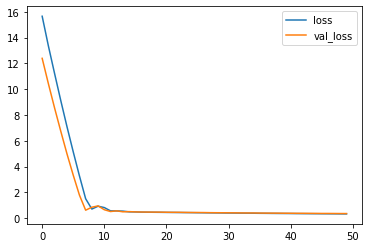

In [47]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

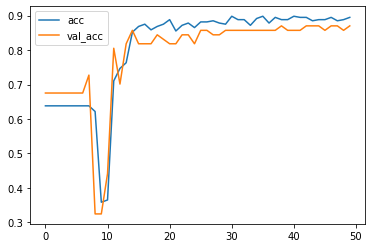

In [48]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Make predictions: 

In [49]:
import numpy as np
Prob = model.predict(X_test)# they are outputs of the sigmoid
Prediction = np.round(Prob).flatten()
print("prediction for the first element is {} with probability {}".format(Prediction[0],Prob[0][0]))

prediction for the first element is 0.0 with probability 0.0002193748950958252


## Saving and Loading a Model 

You can save an entire model to a single artifact. It will include:

- The model's architecture/config
- The model's weight values (which were learned during training)
- The model's compilation information (if compile()) was called
- The optimizer and its state, if any (this enables you to restart training where you left)



In [40]:
model.save('classifier')

INFO:tensorflow:Assets written to: classifier/assets


In [41]:
!ls -lh 

total 240
-rw-r--r--  1 satyaalmasian  staff   119K Jan 27 11:56 Tensorflow_tutorial.ipynb
drwxr-xr-x  5 satyaalmasian  staff   160B Jan 27 12:12 classifier


**saved_model.pb:** contains the model architecture, and training configuration (including the optimizer, losses, and metrics) 

**variables:**: The weights. 

In [42]:
! ls classifier

assets         saved_model.pb variables


In [43]:
# Let's load the model and confirm that it still works
reconstructed_model = tf.keras.models.load_model('classifier')

# Let's check if they are the same model 
np.testing.assert_allclose(
    model.predict(X_test), reconstructed_model.predict(X_test)
)
# you can even resume training 
reconstructed_model.fit(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8617


### Functional API 

The Keras functional API is a way to create models that are more flexible models, which handle models with non-linear topology, shared layers, and even multiple inputs or outputs. You have to explicitly connect the output of one layer to the input of another layer. 

An input layer must be defined via the `Input class`, the next layer takes the input layer as input, it is best to retain a reference to the input layer. Then we incrementally add the next output to the input of the layer after... This allows for more complicated model designs, such as models that may have multiple input paths or output paths. 

We will use the Iris flowers multiclass classification dataset to demonstarte the Functional API.  

In [44]:
from sklearn import datasets
iris = datasets.load_iris()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)

In [46]:
# define the layers
D = X_train.shape[1]
x_in = tf.keras.layers.Input(shape=(D,))
x = tf.keras.layers.Dense(10,activation='relu')(x_in)
x = tf.keras.layers.Dense(8,activation='relu')(x)
x_out = tf.keras.layers.Dense(3,activation='softmax')(x)# we have 3 classes, so we use the softmax funciton 

# define the model
model = tf.keras.models.Model(inputs=x_in, outputs=x_out,name="my_functional_model")

In [47]:
model.summary()

Model: "my_functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [48]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#we change the loss function 
# is appropriate for integer encoded class labels 
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)# you can remove the report 

In [49]:
# evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.9400


[0.5078591704368591, 0.9399999976158142]

## Keras Important Layers and Functions

Keras layers API provides a set of pre-defined layers and functions that you can apply to them. Some of the layers worth noting are as follows: 

For convolutions: 
- `tf.keras.layers.Conv1D (filters=#output_channel, kernel_size=filter_size, strides=1, padding='valid',activation=None,.....)`
- `tf.keras.layers.Conv2D(filters=#output_channel, kernel_size=filter_size, strides=(1, 1), padding='valid',activation=None,....`

For Pooling (Same can be done with max pooling): 

- `tf.keras.layers.AveragePooling1D( pool_size=2, strides=None, padding='valid',....)`
- `tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid',...)`

For deeply connected layer: 
 - `tf.keras.layers.Dense( units=#output_space, activation=None, use_bias=True,...)`

For flattening of the input: 
- ` tf.keras.layers.Flatten(...)`

For RNNS: 
- `tf.keras.layers.GRU(units=#ouput_space, activation='tanh',  use_bias=True,initial_state =#custom_init_state ...)`
- `tf.keras.layers.LSTM( units=#ouput_space, activation='tanh', use_bias=True, ...) `
- `tf.keras.layers.RNN(cell=#list_cell_instances, return_sequences=False, return_state=False, go_backwards=False,..)`
- `tf.keras.layers.Bidirectional(layer=#instance_of_RNN_or_lstm_or_gru, merge_mode='concat', weights=None, backward_layer=None,...)`

For Input: 
- `tf.keras.layers.InputLayer(input_shape=None, batch_size=None, dtype=None, input_tensor=None, sparse=False,...)`
-`tf.keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform',...`)

For Tensor operations: 
- `tf.keras.layers.Concatenate(axis=-1,...)`
- `tf.keras.layers.Reshape(target_shape,...)`
- `tf.keras.layers.Multiply(...)`


Many others, some important concepts and layer not discussed in class are : 

- **Dropout:**  randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. (only applies when training)
- **BatchNormalization:** transformation so that the mean output close to 0 and the output standard deviation close to 1. Same as scaling your input, it makes the training easier. 

We see more of these layers when we create different models. 

## Keras preprocessing layers 

You can use these layers to create a pre-processing pipeline. They can be combined directly with Keras models, and exported with the rest of your model. 

## Core preprocessing layers

- `TextVectorization`: turns raw strings into an encoded representation that can be read by an `Embedding layer` or `Dense layer`.
- `Normalization layer`: performs feature-wise normalize of input features.

## Structured data preprocessing layers

- `CategoryEncoding layer`: turns integer categorical features into one-hot, multi-hot, or TF-IDF dense representations.
- `Discretization layer`: turns continuous numerical features into integer categorical features.
- `StringLookup layer`: turns to string categorical values into integers indices.
- `CategoryCrossing layer`: combines categorical features into co-occurrence features. E.g. if you have feature values "a" and "b", it can provide with the combination feature "a and b are present at the same time".


Some layers require **adaptation**, meaning these layers have an internal state that must be computed based on a sample of the training . These layers are **non-trainable**, their state must be set before training, using the `adapt` method.
- `TextVectorization`
- `Normalization`
- `StringLookup`
- `CategoryEncoding`
- `Discretization`

In [50]:
from tensorflow.keras.layers.experimental import preprocessing
data = [
    "hello",
    "this is an introdcution to tensorflow"
]
preprocessing_layer = preprocessing.TextVectorization()
preprocessing_layer.adapt(data)
vectorized_text = preprocessing_layer(data)
print(vectorized_text)

tf.Tensor(
[[7 0 0 0 0 0]
 [3 5 8 6 2 4]], shape=(2, 6), dtype=int64)


You can apply the preprocessing in two ways: 

**Option 1:** Make them part of the model. With this option, preprocessing will happen on whichever device you are training on (GPU/CPU). Another benefit is that the preprocessing will be part of the model you export, which makes the model portable. When all data preprocessing is part of the model, other people can load and use your model without having to be aware of how each feature is expected to be encoded & normalized. 

``` 
inputs = tf.keras.Input(shape=input_shape)
x = preprocessing_layer(data)
outputs = rest_of_the_model(x)
model = tf.keras.Model(inputs, outputs)
```

**Option 2:** apply it to a TensorFlow dataset to obtain a dataset that yields batches of preprocessed data. With this option, your preprocessing will happen on the CPU.

```
dataset = dataset.map(
  lambda x, y: (preprocessing_layer(x), y))
```

## Predict the tag for a Stack Overflow question

In this example, we use a CNN to predict the category of programming questions from the StackOverflow (Python, CSharp, JavaScript, or Java). This is an example of multi-class classification. You can look at the in-depth tutorial here: https://www.tensorflow.org/tutorials/load_data/text

In [51]:
#!pip install tensorflow_datasets
#!pip install -q -U tensorflow-text

In [52]:
import collections
import pathlib
import re
import string

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

import tensorflow_datasets as tfds
import tensorflow_text as tf_text

In [53]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'
dataset = utils.get_file(
    'stack_overflow_16k.tar.gz',
    data_url,
    untar=True,
    cache_dir='stack_overflow',
    cache_subdir='')
dataset_dir = pathlib.Path(dataset).parent

The train folder contains the data for each class in a separate folder.

In [54]:
train_dir = dataset_dir/'train'
list(train_dir.iterdir())

[PosixPath('/tmp/.keras/train/python'),
 PosixPath('/tmp/.keras/train/java'),
 PosixPath('/tmp/.keras/train/csharp'),
 PosixPath('/tmp/.keras/train/javascript')]

To read the data and prepare it into  format suitable for training we use 'tf.keras.preprocessing.text_dataset_from_directory' to create a tensorflow dataset. **Dateset** represents a set of elements and can contain transformation and preprocessing steps. During training it iterates over the dataset and process the elements.

In [55]:
batch_size = 32
seed = 42
test_dir = dataset_dir/'test'

raw_train_ds = preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,# we keep some of the data for validation 
    subset='training',
    seed=seed)

raw_val_ds = preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

raw_test_ds = preprocessing.text_dataset_from_directory(
    test_dir, batch_size=batch_size)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


The labels are 0, 1, 2 or 3. To see which of these correspond to which string label, you can check the class_names property on the dataset.

In [56]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(2,4):
        print("Question: ", text_batch.numpy()[i])
        print("Label:", label_batch.numpy()[i])
        print("Lable name:",raw_train_ds.class_names[label_batch.numpy()[i]])

Question:  b'"option and validation in blank i want to add a new option on my system where i want to add two text files, both rental.txt and customer.txt. inside each text are id numbers of the customer, the videotape they need and the price...i want to place it as an option on my code. right now i have:...add customer.rent return.view list.search.exit...i want to add this as my sixth option. say for example i ordered a video, it would display the price and would let me confirm the price and if i am going to buy it or not...here is my current code:..  import blank.io.*;.    import blank.util.arraylist;.    import static blank.lang.system.out;..    public class rentalsystem{.    static bufferedreader input = new bufferedreader(new inputstreamreader(system.in));.    static file file = new file(""file.txt"");.    static arraylist&lt;string&gt; list = new arraylist&lt;string&gt;();.    static int rows;..    public static void main(string[] args) throws exception{.        introduction();.  

**Prepare the dataset for training:** We clean the text, tokenize it and vectorize it using the `preprocessing.TextVectorization`. 
- The default standardization converts text to lowercase and removes punctuation.

- The default tokenizer splits on whitespace.

- The default vectorization mode is int. This outputs integer indices (one per token).

In [57]:
MAX_SEQUENCE_LENGTH = 250
VOCAB_SIZE = 10000

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)#how big your sequences will be

In [58]:
train_text = raw_train_ds.map(lambda text, labels: text)# only the text 
int_vectorize_layer.adapt(train_text)

In [59]:
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
first_question=tf.expand_dims(first_question, -1)
print("'int' vectorized question:",
      int_vectorize_layer(first_question), first_label)

'int' vectorized question: tf.Tensor(
[[1011  773    9 2456    8 1863 2362  690 1267    4   40    5    1 1011
   196   12   74   13   72   33    2   98  105   14    3   70 9611    3
    34  888  202  773  107    8   41  242   40   58  291   90    3  196
   191   10    2  182    6  668    6   13   30 1187   12  773   22   42
     1   28    5  140   29 5213   15   29    1   28   51    1    1    1
     7   23   30    3  291   10   67    6   32   65  185  166  102   14
     2   65    6    1  193    9 2784   45 2410    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0

In [60]:
print("1289 ---> ", int_vectorize_layer.get_vocabulary()[1289])
print("313 ---> ", int_vectorize_layer.get_vocabulary()[313])
print("Vocabulary size: {}".format(len(int_vectorize_layer.get_vocabulary())))

1289 --->  roman
313 --->  source
Vocabulary size: 10000


You also need to preprocess the validation and test set in the same way:

In [61]:
def int_vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return int_vectorize_layer(text), label
    
int_train_ds = raw_train_ds.map(int_vectorize_text)
int_val_ds = raw_val_ds.map(int_vectorize_text)
int_test_ds = raw_test_ds.map(int_vectorize_text)

**Configure the dataset for performance:** You can read more about efficiently loading your data here : https://www.tensorflow.org/guide/data_performance. Two important methods to keep in mind are `.cache()` to keep data in memory after it's loaded off disk and `.prefetch()` overlaps data preprocessing and model execution while training.

In [62]:
AUTOTUNE = tf.data.AUTOTUNE

def configure_dataset(dataset):
    return dataset.cache().prefetch(buffer_size=AUTOTUNE)
int_train_ds = configure_dataset(int_train_ds)
int_val_ds = configure_dataset(int_val_ds)
int_test_ds = configure_dataset(int_test_ds)

We use 1D convultions with maxpooling: 

In [63]:
def create_model(vocab_size, num_labels):
    model = tf.keras.Sequential([
      layers.Embedding(vocab_size, 64, mask_zero=True),
      layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
      layers.GlobalMaxPooling1D(), #Global max pooling = ordinary max pooling layer with pool size equals to the size of the input 
      layers.Dense(num_labels)
  ])
    return model

In [64]:
# vocab_size is VOCAB_SIZE + 1 since 0 is used additionally for padding.
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=4)
int_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),#It is not a probability distirbution but logits 
    optimizer='adam',
    metrics=['accuracy'])
history = int_model.fit(int_train_ds, validation_data=int_val_ds, epochs=5)

Epoch 1/5
200/200 [==============================] - 3s 15ms/step - loss: 1.3021 - accuracy: 0.3980 - val_loss: 0.7539 - val_accuracy: 0.6900
Epoch 2/5
200/200 [==============================] - 2s 12ms/step - loss: 0.7033 - accuracy: 0.7187 - val_loss: 0.5559 - val_accuracy: 0.7875
Epoch 3/5
200/200 [==============================] - 2s 12ms/step - loss: 0.4390 - accuracy: 0.8567 - val_loss: 0.4783 - val_accuracy: 0.8194
Epoch 4/5
200/200 [==============================] - 2s 12ms/step - loss: 0.2515 - accuracy: 0.9385 - val_loss: 0.4735 - val_accuracy: 0.8156
Epoch 5/5
200/200 [==============================] - 2s 12ms/step - loss: 0.1308 - accuracy: 0.9739 - val_loss: 0.4967 - val_accuracy: 0.8106


In [65]:
int_loss, int_accuracy = int_model.evaluate(int_test_ds)
print("Int model accuracy: {:2.2%}".format(int_accuracy))

250/250 [==============================] - 1s 4ms/step - loss: 0.5216 - accuracy: 0.8040
Int model accuracy: 80.40%


## Text classification with an RNN
 

We train a RNN on the IMDB large movie review dataset for sentiment analysis. Full example can be seen here: https://www.tensorflow.org/tutorials/text/text_classification_rnn

In [66]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


In [67]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [68]:
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [69]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [70]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [71]:
encoded_example = encoder(example).numpy()
encoded_example

array([ 11,  14,  34, 412, 384,  18,  90,  28,   1,   8,  33,   1,   1,
        42, 487,   1, 191,  24,  85, 152,  19,  11, 217, 316,  28,  65,
       240, 214,   8, 489,  54,  65,  85, 112,  96,  22,   1,  11,  93,
       642, 743,  11,  18,   7,  34, 394,   1, 170,   1, 408,   2,  88,
         1, 137,  66, 144,  51,   2,   1,   1,  66, 245,  65,   1,  16,
         1,   1,   1,   1,   1,   1,   3,  40,   1,   1,  17,   1,  14,
       158,  19,   4,   1, 891,   1,   8,   4,  18,  12,  14,   1,   5,
        99, 146,   1,  10, 237, 704,  12,  48,  24,  93,  39,  11,   1,
       152,  39,   1,   1,  50, 398,  10,  96,   1, 851, 141,   9])

In [72]:
vocab = np.array(encoder.get_vocabulary())
print("Original: ", example.numpy())
print("Round-trip: ", " ".join(vocab[encoded_example]))

Original:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Round-trip:  this was an absolutely terrible movie dont be [UNK] in by [UNK] [UNK] or michael [UNK] both are great actors but this must simply be their worst role in history even their great acting could not [UNK] this movies ridiculous storyline this movie is an early [UNK] 

The model : 

1. `encoder`, our preprocessing,  converts the text to a sequence of token indices.
2. `Embedding` stores one vector per word, based on the indicies from `encoder`. These will become your word embeddings. 
3. `Bidirectional` RNN propagates the input forward and backwards through the RNN layer and then concatenates the final output with LSTM cells. 
4. Finally two `Dense` layers to get to our classification output. 
![alt text](https://www.tensorflow.org/tutorials/text/images/bidirectional.png "keras" )

In [73]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

The embedding layer uses masking to handle the varying sequence-lengths. All the layers after the Embedding support masking:

In [74]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [75]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [76]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 291s 729ms/step - loss: 0.6837 - accuracy: 0.5139 - val_loss: 0.4960 - val_accuracy: 0.7896
Epoch 2/10
391/391 [==============================] - 326s 832ms/step - loss: 0.4313 - accuracy: 0.8024 - val_loss: 0.3569 - val_accuracy: 0.8484
Epoch 3/10
391/391 [==============================] - 340s 870ms/step - loss: 0.3389 - accuracy: 0.8509 - val_loss: 0.3385 - val_accuracy: 0.8547
Epoch 4/10
391/391 [==============================] - 326s 834ms/step - loss: 0.3220 - accuracy: 0.8603 - val_loss: 0.3257 - val_accuracy: 0.8589
Epoch 5/10
391/391 [==============================] - 335s 857ms/step - loss: 0.3058 - accuracy: 0.8681 - val_loss: 0.3302 - val_accuracy: 0.8583
Epoch 6/10
391/391 [==============================] - 302s 772ms/step - loss: 0.3100 - accuracy: 0.8690 - val_loss: 0.3301 - val_accuracy: 0.8417
Epoch 7/10
391/391 [==============================] - 291s 745ms/step - loss: 0.3042 - accuracy: 0.8695 - val_loss: 0.3317 -

In [77]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 75s 192ms/step - loss: 0.3250 - accuracy: 0.8634
Test Loss: 0.32497838139533997
Test Accuracy: 0.8633999824523926


(0, 0.6601747632026672)

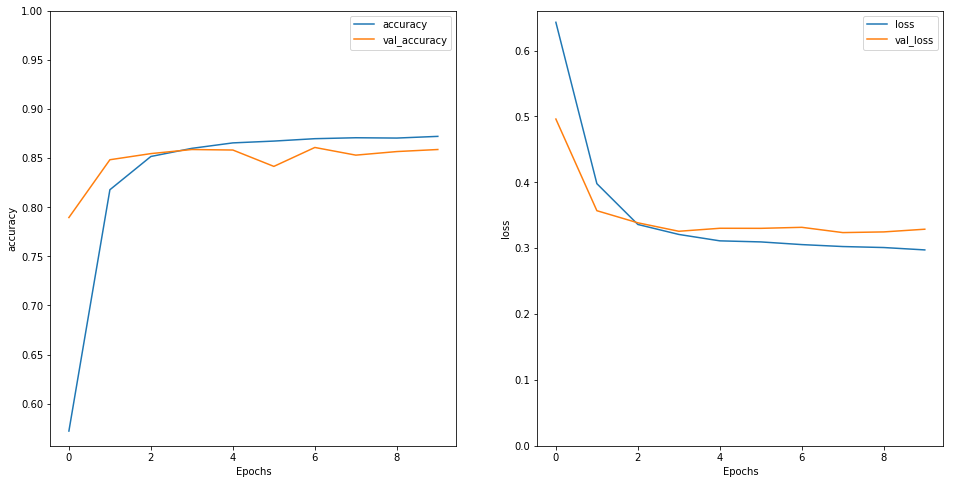

In [78]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)